# Import

In [1]:
import pandas as pd
import json
from pprint import pprint
import pickle

In [5]:
world = pd.read_csv('./world-cities.csv')

In [6]:
world[world['name'] == 'London']

,name,country,subcountry,geonameid
2465,London,Canada,Ontario,6058560
7530,London,United Kingdom,England,2643743


In [7]:
world_countries = list(set(world['country'].tolist()))

In [8]:
df = pd.read_csv('./data.csv', header=None)

In [9]:
df_countries = df[3].values.tolist()
new_names = []
for country in df_countries:
    if country == 'UK':
        new_names.append('United Kingdom')
    elif not type(country) == str:
        new_names.append('')
    elif country == 'USA':
        new_names.append('United States')
    elif len(country.split(' ')) > 2:
        new_names.append('')
    else:
        new_names.append(country)

In [12]:
countries_processed = []
for entry in pd.Series(new_names).value_counts().iteritems():
    if entry[1] > 5 and entry[0] != '':
        countries_processed.append(entry[0])


In [13]:
countries_processed

['United Kingdom',
 'Ukraine',
 'London',
 'United States',
 'Everywhere',
 'London, England',
 'India',
 'Tokyo, Japan',
 'Brussels',
 'Washington, DC',
 'World',
 'Україна',
 'Almere, Nederland',
 'Kyiv',
 'Planet Earth',
 'Europe',
 'Kyiv, Ukraine',
 'Internet',
 'Germany',
 'Global',
 'Australia',
 'Украина',
 'New York',
 'Ireland',
 'Diksmuide, België',
 'London, UK',
 'Canada',
 'Washington, D.C.',
 'Hartford, CT',
 'Kiev',
 'Brussels, Belgium',
 'Mumbai, India',
 'Northeast U.S.',
 'Earth',
 'Ukraine ',
 'Delhi, India',
 'Davie, FL',
 'Turkey',
 'New Delhi',
 'Québec, Canada',
 'Pennsylvania',
 'h̤͓̺̲͢͡è̷̶͔͔̲̪̯ľ̺͚̬̞͓̇̃͗͏̡̀l',
 'global',
 'Africa',
 'Netherlands',
 'Odessa, Ukraine',
 'Kampala',
 'Helsinki, Finland',
 'Norway',
 'Berlin',
 'California, USA',
 'Athens Greece',
 'Singapore',
 'Early, TX',
 'Washington DC',
 'Berlin, Germany',
 'Nottingham, England',
 'Canada ',
 'New Jersey',
 'Worldwide',
 'The Netherlands',
 'Sweden',
 'Pakistan',
 'Scotland',
 'Marbella, Spai

In [16]:
countries_map = {'London': 'United Kingdom', 
                'London, England': 'United Kingdom', 
                'Almere, Nederland': 'United Kingdom', 
                'England': 'United Kingdom', 
                'Russia': 'United Kingdom', 
                'Sweden': 'United Kingdom', 
                'EU ': 'United Kingdom', 
                'Ireland': 'United Kingdom', 
                'Marbella, Spain': 'United Kingdom', 
                'Scotland': 'United Kingdom', 
                'Europe': 'United Kingdom', 
                'Amsterdam': 'United Kingdom', 
                'Istanbul': 'United Kingdom', 
                'Berlin': 'United Kingdom', 
                'The Netherlands': 'United Kingdom', 
                'Germany': 'United Kingdom', 
                'Washington, DC': 'United States', 
                'Washington, D.C.': 'United States', 
                'U.S.A': 'United States', 
                'Chicago': 'United States', 
                'Florida, USA': 'United States', 
                'Early, TX': 'United States', 
                'California, USA': 'United States', 
                'Washington DC': 'United States', 
                ' USA': 'United States', 
                'New Jersey': 'United States', 
                'Hartford, CT': 'United States', 
                'Northeast U.S': 'United States', 
                'Україна': 'Ukraine',
                'Kyiv': 'Ukraine',
                'Kiev': 'Ukraine',
                'Kyiv, Ukraine': 'Ukraine',
                'Украина': 'Ukraine',
                'New York': 'United States',
                'United States': 'United States',
                'USA': 'United States',
                'UK': 'United Kingdom',
                'United Kingdom': 'United Kingdom',
                'London, UK': 'United Kingdom',
                'Everywhere': 'Everywhere',
                'Planet Earth': 'Everywhere',
                'Global': 'Everywhere',
                'Brussels': 'United Kingdom',
                'India': 'India',
                'Pakistan': 'India',
                'New Delhi': 'India',
                'Delhi, India': 'India',
                'Delhi, India': 'India',
                'Lagos, Nigeria': 'Africa',
                'Uganda': 'Africa',
                'Africa': 'Africa',
                'Mumbai, India': 'India'}

In [17]:
continents_map = {'United Kingdom': 'Europe',
                'United States': 'USA',
                'Ukraine' : 'Europe',
                'India' : 'Middle East',
                'Africa': 'Africa'
                }

In [18]:
df['countries'] = df[3].map(countries_map)
df['topics'] = df['countries'].map(continents_map)

In [19]:
df_clean_countries = df[df['topics'].notna()] 

In [20]:
df_clean_countries

,0,1,2,3,4,5,countries,topics
22,1.560000e+18,2022-08-17 13:04:30+00:00,Multiple explosions shook a #russianlosses mil...,USA,0,0,United States,USA
25,1.560000e+18,2022-08-17 12:59:33+00:00,This is not just about German policy versus Ru...,USA,0,0,United States,USA
27,1.560000e+18,2022-08-17 12:59:28+00:00,How emotional from the #UKRAINE swimmer who wo...,USA,0,0,United States,USA
29,1.560000e+18,2022-08-17 12:59:17+00:00,We've seen such photos a lot during the Syrian...,USA,0,0,United States,USA
30,1.560000e+18,2022-08-17 12:58:14+00:00,The West's outcry about #Abbas remarks is amus...,USA,0,0,United States,USA
...,...,...,...,...,...,...,...,...
4942,1.560000e+18,2022-08-17 01:25:11+00:00,It was great to be able to support @TovaOBrien...,"Washington, DC",1,2,United States,USA
4944,1.560000e+18,2022-08-17 01:24:07+00:00,"Reminder: Russia has seen warm-water ports, pa...","Washington, DC",0,0,United States,USA
4946,1.560000e+18,2022-08-17 01:23:59+00:00,Russia-Ukraine war latest: what we know on day...,"Washington, DC",22,48,United States,USA
4947,1.560000e+18,2022-08-17 01:23:35+00:00,I just signed this workers' rights petition: h...,"Washington, DC",0,0,United States,USA


# Preprocess

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
from nltk.tokenize import word_tokenize
import preprocessor as p
from string import punctuation

[nltk_data] Downloading package stopwords to C:\Users\Risto
[nltk_data]     Trajanov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
p.clean(df[2].tolist()[0])

'Ukraine and Russia: What you need to know right now'

In [23]:
def most_frequent_words(tweets:list):
    count_vectorizer =  CountVectorizer(max_features=1000)
    feature_vector = count_vectorizer.fit(tweets)
    features = feature_vector.get_feature_names()
    train_ds_features = count_vectorizer.transform(tweets)
    features_counts =  np.sum(train_ds_features.toarray(),axis=0)
    features_counts = pd.DataFrame(dict(features = features, counts = features_counts))
    features_counts.sort_values('counts', ascending=False)[0:15]
    return features_counts['features'].values.tolist()

In [24]:
def remove_stopwords_and_numbers(tweet:str):
    tokens = word_tokenize(tweet)
    new_tweet = [word for word in tokens if word not in stopwords and not word.isnumeric() and word not in punctuation and len(word)>3]
    return ' '.join(new_tweet)

In [25]:
def remove_not_frequent(tweet:str, most_frequent:list):
    tokens = word_tokenize(tweet)
    new_tweet = [word for word in tokens if word in most_frequent]
    return ' '.join(new_tweet)

In [26]:
most_frequent = most_frequent_words(df[2].tolist())

c:\Users\Risto Trajanov\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
tweets_clean = []
for tweet in df_clean_countries[2].tolist():
    tweet = p.clean(tweet)
    tweet_clean = remove_stopwords_and_numbers(tweet)
    # tweet_clean = remove_not_frequent(tweet_clean, most_frequent)
    # if tweet_clean:
    tweets_clean.append(tweet_clean)

In [28]:
df_clean_countries['tweet_clean'] = tweets_clean

c:\Users\Risto Trajanov\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
df_clean_countries = df_clean_countries[df_clean_countries['tweet_clean'].notna()]

In [30]:
df_clean_countries.to_csv('./clean_data.csv')

# Topic modeling

## LDA

In [39]:
df = pd.read_csv('./clean_data.csv')

In [51]:
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim
from gensim.models import CoherenceModel

In [41]:
# Sentence to word function
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence).lower(), deacc=True))

In [42]:
data_words = list(sent_to_words(df['tweet_clean']))

In [43]:
data_words[0]

['multiple',
 'explosions',
 'shook',
 'military',
 'base',
 'tuesday',
 'latest',
 'spate',
 'similar',
 'incidents',
 'occupied',
 'peninsula']

In [44]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]


In [45]:
countries = list(set(df['topics'].tolist()))

In [46]:
countries

['Europe', 'Africa', 'Middle East', 'USA']

In [52]:
coherence_lda_df = []
for country in countries:
    df_country = df[df['topics'] == country]
    data_words = list(sent_to_words(df_country['tweet_clean']))
    # Create Dictionary
    id2word = corpora.Dictionary(data_words)
    # Create Corpus
    texts = data_words
    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in texts]
    # View
    # print(corpus[:1][0][:30])
    # number of topics
    # num_topics = 8
    # Build LDA model
    for num_topics in range(6, 12):
        lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=num_topics)
        # Print the Keyword in the 10 topics
        pprint(lda_model.print_topics())
        doc_lda = lda_model[corpus]
        # Visualize the topics
        pyLDAvis.enable_notebook()
        LDAvis_data_filepath = f'./topic_modeling/{country}'
        # # this is a bit time consuming - make the if statement True
        # # if you want to execute visualization prep yourself
        if 1 == 1:
            LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
            with open(LDAvis_data_filepath, 'wb') as f:
                pickle.dump(LDAvis_prepared, f)
        # load the pre-prepared pyLDAvis data from disk
        with open(LDAvis_data_filepath, 'rb') as f:
            LDAvis_prepared = pickle.load(f)
        pyLDAvis.save_html(LDAvis_prepared, f'./topic_modeling_viz/{country}_topics_{num_topics}.html')

        coherence_model_lda = CoherenceModel(model=lda_model, 
                                        texts=texts, 
                                        dictionary=id2word, 
                                        coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()
        coherence_lda_df.append([num_topics, coherence_lda, country])
        LDAvis_prepared

[(0,
  '0.041*"ukraine" + 0.023*"russia" + 0.012*"russian" + 0.007*"crimea" + '
  '0.007*"russias" + 0.006*"ukrainian" + 0.006*"nuclear" + 0.006*"follow" + '
  '0.005*"sabotage" + 0.005*"invasion"'),
 (1,
  '0.024*"ukraine" + 0.013*"russia" + 0.012*"russian" + 0.006*"nuclear" + '
  '0.005*"putin" + 0.004*"attack" + 0.004*"more" + 0.004*"invasion" + '
  '0.004*"russias" + 0.004*"like"'),
 (2,
  '0.020*"ukraine" + 0.013*"russia" + 0.011*"russian" + 0.007*"russians" + '
  '0.006*"crimea" + 0.006*"ukrainians" + 0.006*"russias" + 0.005*"behind" + '
  '0.005*"never" + 0.005*"enemy"'),
 (3,
  '0.026*"ukraine" + 0.016*"russia" + 0.010*"russian" + 0.007*"please" + '
  '0.006*"says" + 0.006*"follow" + 0.006*"looking" + 0.005*"forces" + '
  '0.005*"odesa" + 0.005*"first"'),
 (4,
  '0.038*"ukraine" + 0.032*"russia" + 0.018*"russian" + 0.010*"month" + '
  '0.008*"putin" + 0.006*"russians" + 0.006*"today" + 0.005*"military" + '
  '0.005*"ctoday" + 0.005*"world"'),
 (5,
  '0.035*"russia" + 0.030*"ukr

c:\Users\Risto Trajanov\anaconda3\envs\myenv\lib\site-packages\pyLDAvis\_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


[(0,
  '0.042*"ukraine" + 0.022*"russia" + 0.009*"russias" + 0.006*"ukrainian" + '
  '0.006*"russian" + 0.005*"putin" + 0.005*"attack" + 0.005*"news" + '
  '0.004*"want" + 0.004*"crimea"'),
 (1,
  '0.036*"ukraine" + 0.029*"russia" + 0.026*"russian" + 0.008*"putin" + '
  '0.008*"forces" + 0.007*"crimea" + 0.006*"says" + 0.006*"news" + '
  '0.005*"nuclear" + 0.004*"armed"'),
 (2,
  '0.040*"ukraine" + 0.030*"russia" + 0.013*"russian" + 0.007*"ukrainian" + '
  '0.007*"month" + 0.006*"forces" + 0.006*"says" + 0.005*"world" + '
  '0.005*"russias" + 0.005*"article"'),
 (3,
  '0.020*"russia" + 0.014*"ukraine" + 0.010*"russian" + 0.009*"looking" + '
  '0.009*"please" + 0.008*"follow" + 0.008*"president" + 0.008*"military" + '
  '0.007*"putin" + 0.005*"invasion"'),
 (4,
  '0.021*"ukraine" + 0.014*"russia" + 0.009*"month" + 0.006*"lines" + '
  '0.006*"ukrainians" + 0.006*"russias" + 0.005*"verified" + 0.005*"today" + '
  '0.005*"said" + 0.004*"russian"'),
 (5,
  '0.033*"ukraine" + 0.029*"russia" 

In [55]:
coherence_lda_df_pd = pd.DataFrame(coherence_lda_df, columns=['Number of topics', 'Coherence', 'Topic'])

In [56]:
coherence_lda_df_pd

,Number of topics,Coherence,Topic
0,6,0.427906,Europe
1,7,0.426211,Europe
2,8,0.415115,Europe
3,9,0.404516,Europe
4,10,0.417860,Europe
5,11,0.431219,Europe
6,6,0.596759,Africa
7,7,0.532127,Africa
8,8,0.556368,Africa
9,9,0.496103,Africa


In [61]:
countries

['Europe', 'Africa', 'Middle East', 'USA']

Europe
Africa
Middle East
USA


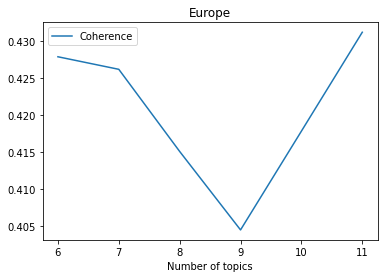

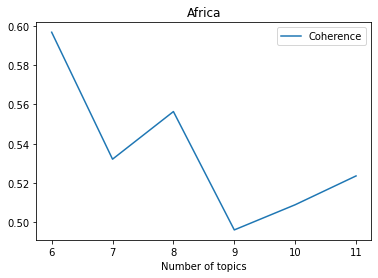

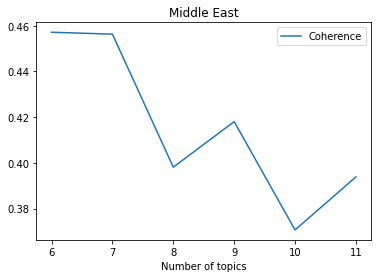

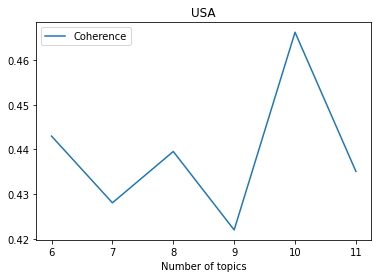

In [64]:
for county in countries:
    print(county)
    vizualize_coherence = coherence_lda_df_pd[coherence_lda_df_pd['Topic'] == county]
    vizualize_coherence.plot.line(x='Number of topics', y='Coherence', rot=0, title=county)

## BERTopic

In [81]:
from bertopic import BERTopic

docs = []
for country in countries:
    df_country = df[df['topics'] == country]
    df_country = df_country['tweet_clean'].tolist()
    df_country = [text.lower() for text in df_country if type(text) == str]
    docs.extend(df_country)


In [82]:
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(docs)

Batches:   0%|          | 0/27 [00:00<?, ?it/s]

2022-08-27 19:49:26,574 - BERTopic - Transformed documents to Embeddings
2022-08-27 19:49:29,311 - BERTopic - Reduced dimensionality
2022-08-27 19:49:29,416 - BERTopic - Clustered reduced embeddings


In [83]:
freq = topic_model.get_topic_info(); freq.head(5)

,Topic,Count,Name
0,-1,260,-1_russia_russian_ukraine_ukrainian
1,0,81,0_crimea_sabotage_highlights_woes
2,1,79,1_forces_region_destroyed_armed
3,2,44,2_invasion_ukraine_sanctions_energy
4,3,43,3_conflict_discover_music_love


In [84]:
topic_model.visualize_topics()

c:\Users\Risto Trajanov\anaconda3\envs\myenv\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\Risto Trajanov\anaconda3\envs\myenv\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [85]:
topic_model.visualize_barchart(top_n_topics=5)

c:\Users\Risto Trajanov\anaconda3\envs\myenv\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\Risto Trajanov\anaconda3\envs\myenv\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



# Sentiment

In [114]:
from textblob import TextBlob

In [126]:
def get_sentiment(text):
    score = TextBlob(text).sentiment.polarity
    if score < -0.1:
        return 'Negative'
    elif score > 0.1:
        return 'Positive'
    else:
        return 'Neutral'

In [117]:
df = df[df['tweet_clean'].notna()]

In [127]:
sent = []
for tweet in df['tweet_clean'].tolist():
    # print(tweet)
    sent.append(get_sentiment(tweet))

In [128]:
df['sentiment'] = sent

c:\Users\Risto Trajanov\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


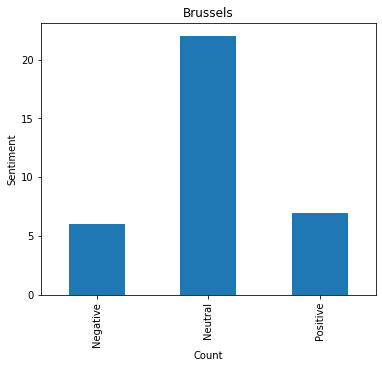

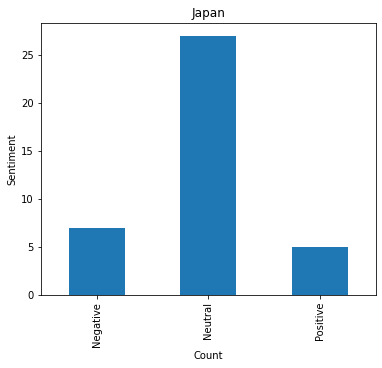

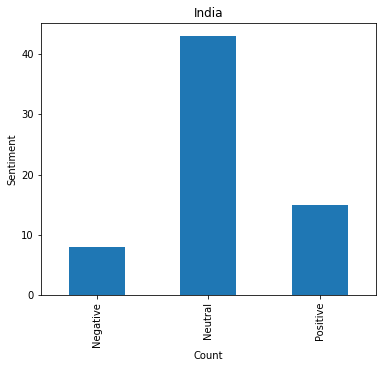

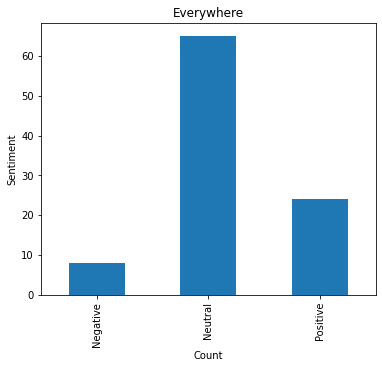

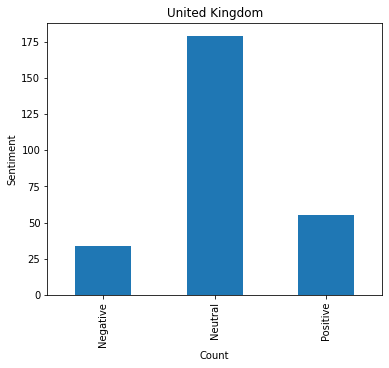

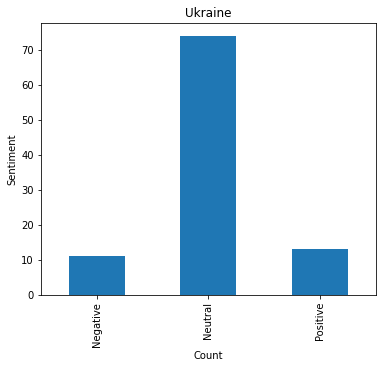

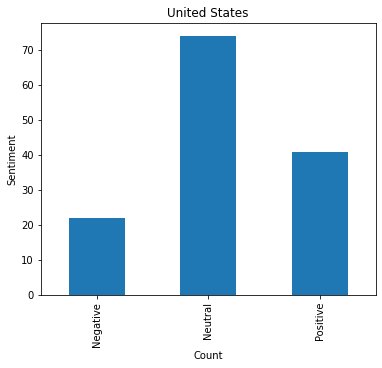

In [129]:
import matplotlib.pyplot as plt
# fig = plt.figure(figsize=(10, 8))
for country in countries:
    df_process = df[df['countries'] == country]
    dfg = df_process.groupby(['sentiment'])['tweet_clean'].count()
    # Plot
    # print(dfg)
    # if not dfg.empty:
    dfg.plot(kind='bar', title=f'{country}', ylabel='Sentiment', xlabel='Count', figsize=(6, 5))
    plt.show()